### Exercise 1.10

Here is an experiment that illustrates the difference between a single bin and multiple bins. Run a computer simulation for flipping 1,000 fair coins. Flip each coin independently 10 times. Let’s focus on 3 coins as follows: $c_{1}$ is the first coin flipped; $c_{rand}$ is a coin you choose at random ; $c_{min}$ is the coin that had the minimum frequency of heads (pick the earlier one in case of a tie). Let $\nu_{1}$, $\nu_{rand}$, $\nu_{min}$ be the fraction of heads you obtain for the respective three coins.

In [1]:
import random
# random.seed(19)

#### I'm defining 0 as heads and 1 as tails

In [2]:
def run_experiment():
    all_coin_flips = []
    for _ in range(1000):
        coin_flips = []
        for _ in range(10):
            coin_flips.append(random.randint(0,1))
        all_coin_flips.append(coin_flips)
    return all_coin_flips

In [3]:
'''
Returns a Tuple -> (index_of_the_coin_flip, amount_of_heads_flipped)
'''
def get_cmin(all_coin_flips):
    less_heads_index = -1
    min_total_heads = 99
    for i in range(len(all_coin_flips)):
        current_total_heads_flip = 0
        for flip in all_coin_flips[i]:
            if (flip == 0):
                current_total_heads_flip += 1
        if (current_total_heads_flip < min_total_heads):
            min_total_heads = current_total_heads_flip
            less_heads_index = i
    return (less_heads_index, min_total_heads)

In [4]:
'''
Returns a Tuple -> (c1, crand, cmin)
'''
def get_c_variables():
    all_coin_flips = run_experiment()
    c1 = all_coin_flips[0][0]
    crand = all_coin_flips[random.randint(0, 999)][random.randint(0, 9)]
    cmin = get_cmin(all_coin_flips)
    
    return (c1, crand, cmin)

#### 1. What is $\mu$ for the three coins selected?

We have a 50/50% chance of getting either heads or tails (assuming fair coins). Therefore we have that $\mu_{1} = \mu_{rand} = \mu_{min} = 0.5$.

#### 2. Repeat this entire experiment a large number of times (e.g., 100,000 runs of the entire experiment) to get several instances of $\nu_{1}$, $\nu_{rand}$ and $\nu_{min}$ and plot the histograms of the distribution of $\nu_{1}$, $\nu_{rand}$ and $\nu_{min}$. Notice that which coins end up being $c_{rand}$ and $c_{min}$ may differ from one run to another.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
all_nu_1 = []
all_nu_rand = []
all_nu_min = []

EXPERIMENT_ITERATIONS = 100000
for _ in range(EXPERIMENT_ITERATIONS):
    cs = get_c_variables()
    all_nu_1.append(cs[0])
    all_nu_rand.append(cs[1])
    all_nu_min.append(cs[2])

KeyboardInterrupt: 

(array([15.13484111,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 14.86515889]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

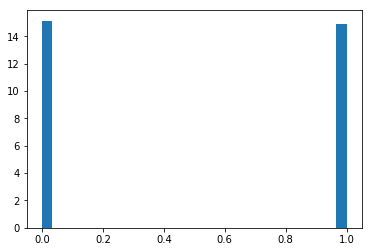

In [7]:
plt.hist(all_nu_1, density=True, bins=30)

$\nu_{min}$ distribution:

$
{\mathbb{P}(\nu_{min} = 0)} = {\displaystyle 1 - \prod_{n=1}^{1000} \mathbb{P}(\nu_n \neq 0)} \\
\qquad\qquad\> = {\displaystyle 1 - \prod_{n=1}^{1000} \big(\mathbb{P}(\nu_n = 0)\big)} \\
\qquad\qquad\> = {\displaystyle 1 - \prod_{n=1}^{1000} \big(1 - 0.5^{10}\big)} \\
\qquad\qquad\> = {\displaystyle 1 - \big(1 - 0.5^{10}\big)^{1000}} \approx 0.6235762\\
$

#### 3. Using (b), plot estimates for  $\mathbb{P} \left [ \left | \nu - \mu \right | > \epsilon \right ]$ as a function of $\epsilon$, together with the Hoeffding bound  $2e^{-2\epsilon^{2}N}$ (on the same graph).